## Description about Data
Row ID: A unique identifier for each row in the dataset (for indexing)

Order ID: Unique code for each order placed.

Order Date: Date when the order was placed.

Ship Date: Date when the order was shipped.

Ship Mode: Shipping method used (e.g., First Class, Standard Class).

Customer ID: Unique ID for each customer.

Customer Name: Name of the customer who placed the order.

Segment: Market segment of the customer (e.g., Consumer, Corporate).

Country: Country where the customer is located.

City: City of the customer.

State: State or province of the customer.

Postal Code: ZIP or postal code of the customer.

Region: Geographical region (e.g., West, East).

Product ID: Unique ID for each product.

Category: Main category of the product (e.g., Furniture).

Sub-Category: Specific type within the category (e.g., Chairs).

Product Name: Name or description of the product.

Sales: Total sales amount for the item.

Quantity: Number of units sold.

Discount: Discount applied (e.g., 0.2 = 20%).

Profit: Profit made from the sale.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import yaml
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [4]:
import os
os.chdir('..')
print(os.getcwd())

e:\Videos\My courses\DEPI\Final Project


In [5]:
with open('configs/paths.yaml','r') as f:
    config = yaml.safe_load(f)

config_dir=config['paths']

In [6]:
df = pd.read_csv(config_dir['raw_data_path'], encoding='ISO-8859-1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2013-138688,13-06-2013,17-06-2013,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [7]:
df.shape

(9994, 21)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [9]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [10]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [11]:
df.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

NO NULL VALUES

In [12]:
# Check for Duplicated values
print(df.duplicated().sum())

0


In [13]:
df.nunique().sort_values(ascending=False)

Row ID           9994
Profit           7287
Sales            5825
Order ID         5009
Product ID       1862
Product Name     1841
Ship Date        1334
Order Date       1238
Customer ID       793
Customer Name     793
Postal Code       631
City              531
State              49
Sub-Category       17
Quantity           14
Discount           12
Region              4
Ship Mode           4
Category            3
Segment             3
Country             1
dtype: int64

In [14]:
# split data to categorical and numerical for exploration
categorical_data = df.select_dtypes(include="object")
numerical_data = df.select_dtypes(include="number")

In [15]:
categorical_data.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name
0,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase
1,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,..."
2,CA-2013-138688,13-06-2013,17-06-2013,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...
3,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table
4,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System


In [16]:
categorical_data.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Region',
       'Product ID', 'Category', 'Sub-Category', 'Product Name'],
      dtype='object')

In [17]:
# Change data type for "Order Data" , "ship Date" to DateTime
categorical_data['Order Date'] = pd.to_datetime(categorical_data['Order Date'],format="%d-%m-%Y")
categorical_data['Ship Date'] = pd.to_datetime(categorical_data['Ship Date'],format="%d-%m-%Y")

In [18]:
# the  Unique years
categorical_data['Order Date'].dt.year.unique()

array([2013, 2012, 2011, 2014])

## Feature Engineering

In [19]:
# Drop column Country because all sales in United States
# we have 2 columns "city " and "State" so we don't need "Postal code" column
numerical_data.drop(['Row ID','Postal Code'],axis=1,inplace=True)
categorical_data.drop(['Order ID','Country','Customer ID','Product ID'],axis=1,inplace=True)

All data from United States we add column holidays in US

In [20]:
# create new column contains Time to Ship the product
categorical_data["Time_taken"] = (categorical_data["Ship Date"] - categorical_data["Order Date"]).dt.days

In [21]:
# Drop ship date column we don't it after adding Time_Taken column
categorical_data.drop("Ship Date",axis=1,inplace=True)

 Sales = Quantity $\times$ Price per Unit  

 Price per Unit = $\frac{\text{Sales}}{\text{Quantity}}$  

In [22]:
numerical_data['price_per_unit'] = numerical_data['Sales'] / numerical_data['Quantity']

In [23]:
# Example: Extract date-based features
categorical_data['year'] = categorical_data['Order Date'].dt.year
categorical_data['month'] = categorical_data['Order Date'].dt.month
categorical_data['day_of_week']= categorical_data['Order Date'].dt.dayofweek
categorical_data['week_of_year'] = categorical_data['Order Date'].dt.isocalendar().week

In [24]:
import holidays
from datetime import date

us_holidays = holidays.UnitedStates()

#Check for
print(date(2013,12 ,25) in us_holidays)

True


In [25]:
# Add columns Holidays
# categorical_data['is_holiday'] = categorical_data['Order Date'].apply(lambda x: x in us_holidays)

Concatenation categorical and numerical data

In [26]:
data = pd.concat([categorical_data, numerical_data], axis=1)

In [27]:
data.head()

,Order Date,Ship Mode,Customer Name,Segment,City,State,Region,Category,Sub-Category,Product Name,Time_taken,year,month,day_of_week,week_of_year,Sales,Quantity,Discount,Profit,price_per_unit
0,2013-11-09,Second Class,Claire Gute,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,3,2013,11,5,45,261.9600,2,0.00,41.9136,130.9800
1,2013-11-09,Second Class,Claire Gute,Consumer,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",3,2013,11,5,45,731.9400,3,0.00,219.5820,243.9800
2,2013-06-13,Second Class,Darrin Van Huff,Corporate,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,4,2013,6,3,24,14.6200,2,0.00,6.8714,7.3100
3,2012-10-11,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,7,2012,10,3,41,957.5775,5,0.45,-383.0310,191.5155
4,2012-10-11,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,7,2012,10,3,41,22.3680,2,0.20,2.5164,11.1840


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order Date      9994 non-null   datetime64[ns]
 1   Ship Mode       9994 non-null   object        
 2   Customer Name   9994 non-null   object        
 3   Segment         9994 non-null   object        
 4   City            9994 non-null   object        
 5   State           9994 non-null   object        
 6   Region          9994 non-null   object        
 7   Category        9994 non-null   object        
 8   Sub-Category    9994 non-null   object        
 9   Product Name    9994 non-null   object        
 10  Time_taken      9994 non-null   int64         
 11  year            9994 non-null   int32         
 12  month           9994 non-null   int32         
 13  day_of_week     9994 non-null   int32         
 14  week_of_year    9994 non-null   UInt32        
 15  Sale

outliers


# Exploratory Data analysis (EDA)

In [29]:
# Display number of unique values in each categorical column
no_unique_value =categorical_data.nunique().sort_values(ascending=False)

# Printing categorical data that has a unique value less than 20 unique value
cat_data = categorical_data.nunique()[no_unique_value<20]
for x in cat_data.index:
  print(x)
  print(categorical_data[x].unique())
  print("------------------------------------------")

Ship Mode
['Second Class' 'Standard Class' 'First Class' 'Same Day']
------------------------------------------
Segment
['Consumer' 'Corporate' 'Home Office']
------------------------------------------
Region
['South' 'West' 'Central' 'East']
------------------------------------------
Category
['Furniture' 'Office Supplies' 'Technology']
------------------------------------------
Sub-Category
['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']
------------------------------------------
Time_taken
[3 4 7 5 2 6 1 0]
------------------------------------------
year
[2013 2012 2011 2014]
------------------------------------------
month
[11  6 10  4 12  5  8  7  9  1  3  2]
------------------------------------------
day_of_week
[5 3 2 4 1 0 6]
------------------------------------------


In [30]:
sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = (15, 6)

In [31]:
sales_profit_per_years = data.groupby(['year','month'])[['Sales','Profit']].sum().reset_index()

print(data.groupby('year')['Sales'].sum().reset_index())

px.line(sales_profit_per_years, x='month', y='Sales', color='year', title='Sales Over Time',markers=True,)


   year        Sales
0  2011  484247.4981
1  2012  470532.5090
2  2013  608473.8300
3  2014  733947.0232


In [32]:
print(data.groupby('year')['Profit'].sum().reset_index())
px.line(sales_profit_per_years, x='month', y='Profit', color='year', title='Profit Over Time',markers=True)

   year      Profit
0  2011  49543.9741
1  2012  61618.6037
2  2013  81726.9308
3  2014  93507.5131


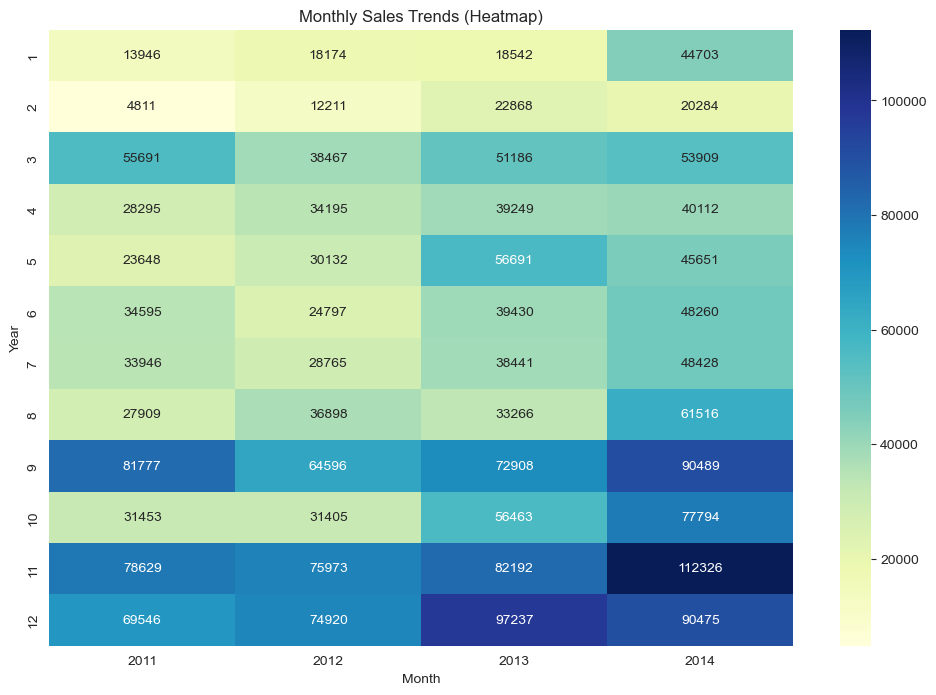

In [33]:
# Create a heatmap of monthly sales trends
monthly_sales = data.pivot_table(values='Sales', columns='year', index='month', aggfunc='sum')

plt.figure(figsize=(12, 8))
sns.heatmap(monthly_sales, cmap='YlGnBu', annot=True, fmt='.0f')
plt.title('Monthly Sales Trends (Heatmap)')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

We have notted that:
>
* `Sales increase from August to December significantly compared to the rest of the months`
* `The Sales were close in 2011 and 2012 and then increased in 2012 and 2014`
* `The profits increase every year more than the previous year`

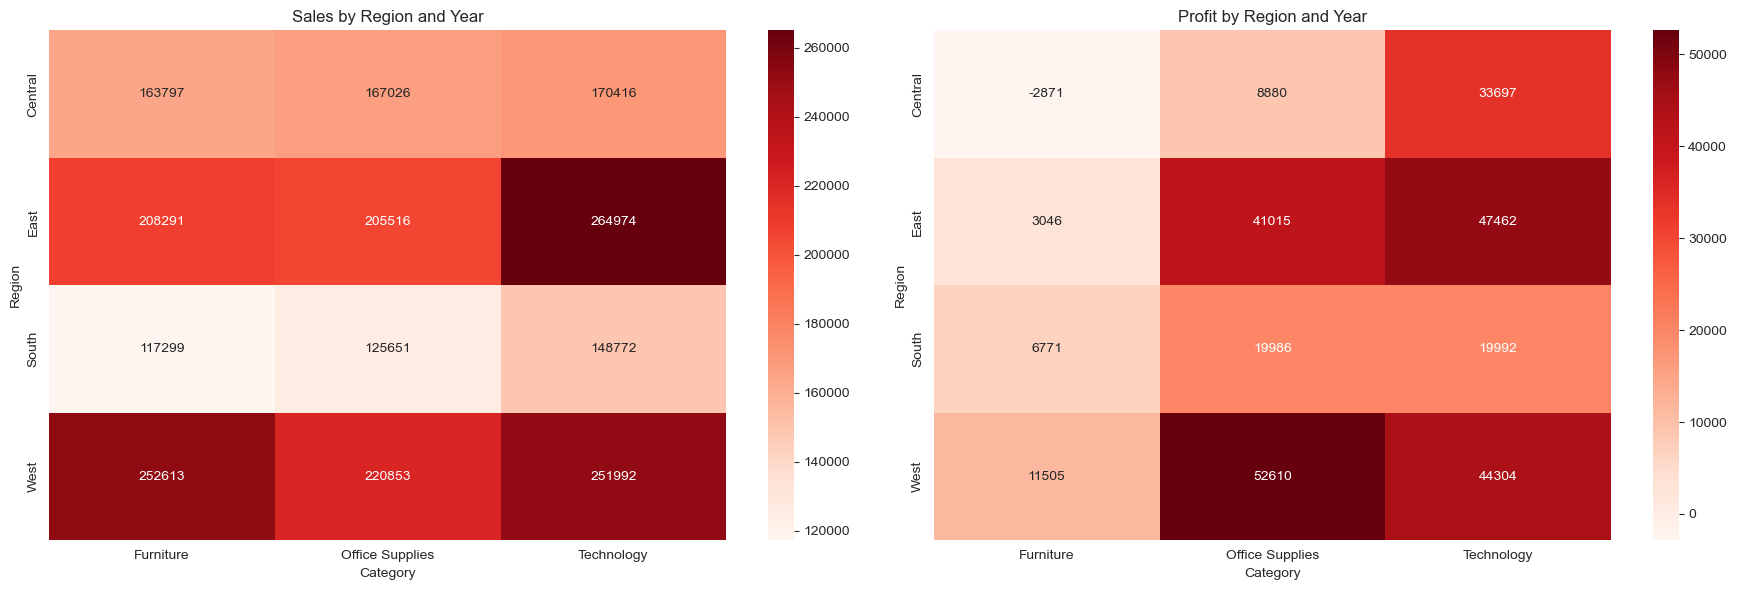

In [34]:
years_region = data.groupby(['Category', 'Region'])[['Sales', 'Profit']].sum().reset_index()

# Creating pivot tables
df_pivot_sales = years_region.pivot(index='Region', columns='Category', values='Sales')
df_pivot_profit = years_region.pivot(index='Region', columns='Category', values='Profit')

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.heatmap(df_pivot_sales, annot=True, cmap='Reds', fmt='.0f', ax=axes[0])
axes[0].set_title('Sales by Region and Year')


sns.heatmap(df_pivot_profit, annot=True, cmap='Reds', fmt='.0f', ax=axes[1])
axes[1].set_title('Profit by Region and Year')

plt.tight_layout()
plt.show()

#### **Some Observations**
> - `The Western region is the most territory of sales in the two categories Furniture, Office Supplies`
> - `The eastern region is the most sales in the category of technology`

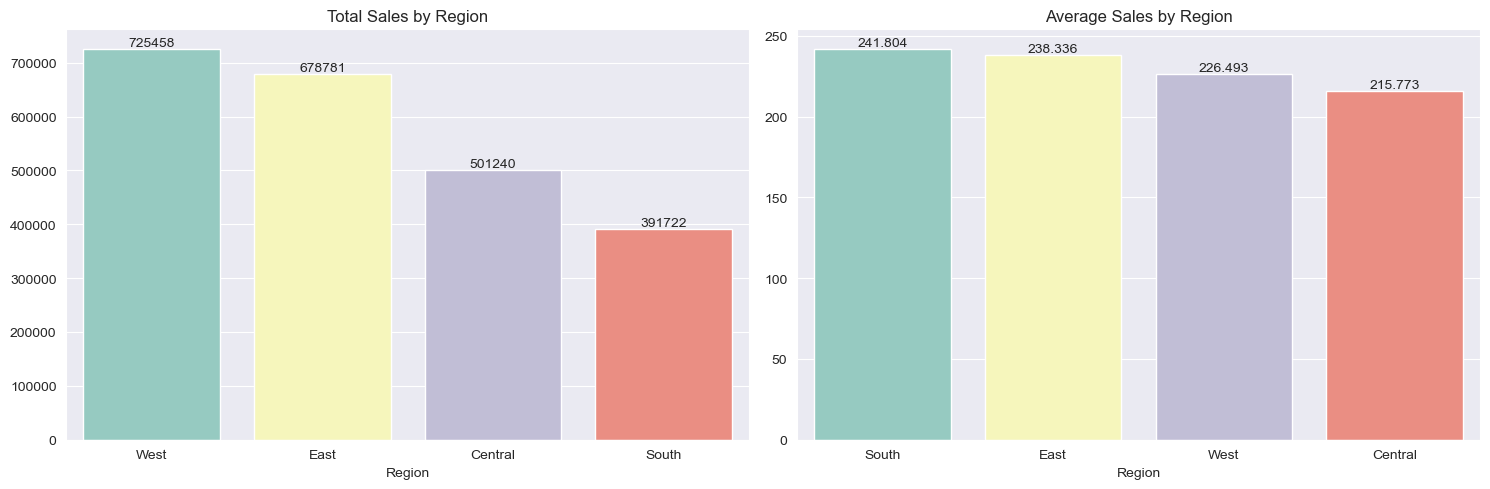

In [35]:
sum_sales_by_region = data.groupby('Region')['Sales'].sum().sort_values(ascending=False)
avg_sales_by_region = data.groupby('Region')['Sales'].mean().sort_values(ascending=False)

ax ,fig = plt.subplots(1,2,figsize=(15,5))

a=sns.barplot(x=sum_sales_by_region.index, y=sum_sales_by_region.values,
              hue=sum_sales_by_region.index,palette="Set3",ax=fig[0])
fig[0].set_title('Total Sales by Region')
for i in a.containers:
    a.bar_label(i)

b=sns.barplot(x=avg_sales_by_region.index, y=avg_sales_by_region.values,hue=avg_sales_by_region.index,palette="Set3",ax=fig[1])
fig[1].set_title('Average Sales by Region')
for i in b.containers:
    b.bar_label(i)

plt.tight_layout()
plt.show()



> -  `We have noticed that the least sales region is the south, but despite that it is the most regional in the average sales and this indicates to every sale in the south achieves a higher value compared to other regions.`

> - `The Western region achieved the highest sales overall, but it ranks third in average sales, behind the Southern and Eastern regions.`


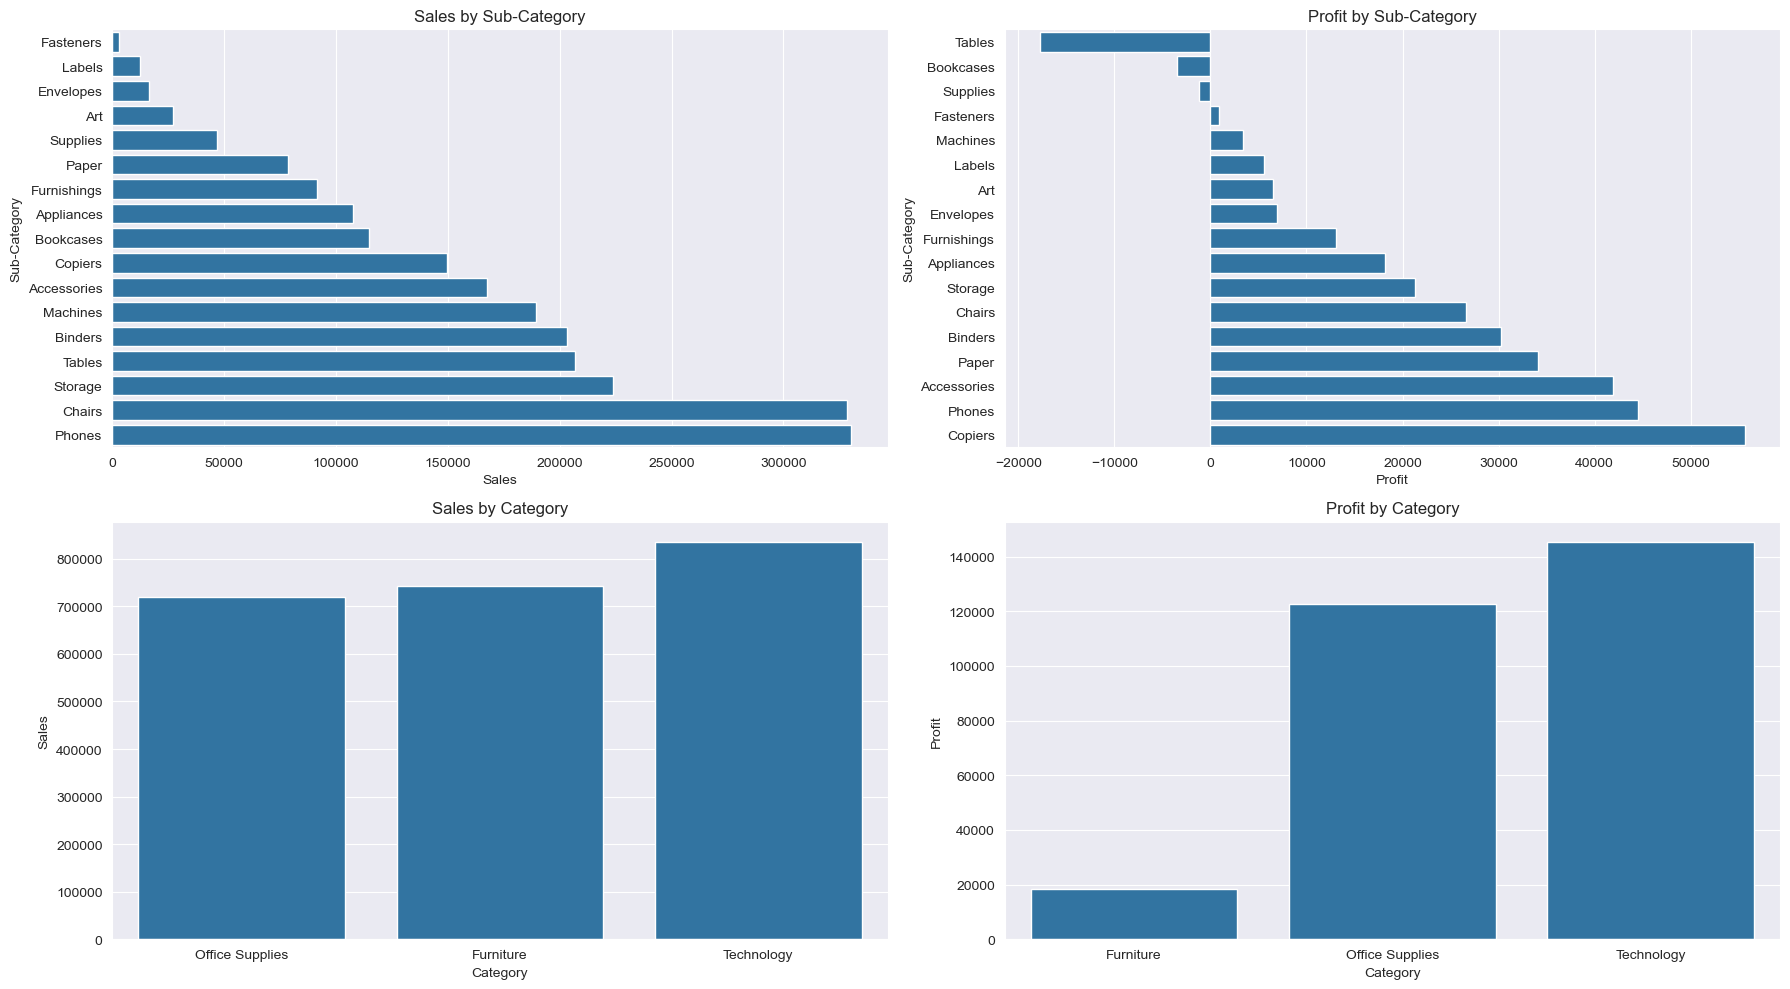

In [36]:
# grouping data by Sub-Category and display it with sales and profits

grouped_data = data.groupby('Sub-Category',as_index=False)[['Sales','Profit']].sum()

fig, axes = plt.subplots(2, 2, figsize=(18, 10))

sns.barplot(data=grouped_data.sort_values(by = 'Sales'), y='Sub-Category', x='Sales', ax=axes[0,0])
axes[0,0].set_title('Sales by Sub-Category')

sns.barplot(data=grouped_data.sort_values(by = 'Profit'), y='Sub-Category', x='Profit', ax=axes[0,1])
axes[0,1].set_title('Profit by Sub-Category')


# grouping data by Category and display it with sales and profits
grouped_data = data.groupby('Category',as_index=False)[['Sales','Profit']].sum()

sns.barplot(data=grouped_data.sort_values(by = 'Sales'), x='Category', y='Sales', ax=axes[1,0])
axes[1,0].set_title('Sales by Category')

sns.barplot(data=grouped_data.sort_values(by = 'Profit'), x='Category', y='Profit', ax=axes[1,1])
axes[1,1].set_title('Profit by Category')

plt.tight_layout()
plt.show()



In [37]:
data.groupby('Category')[['Discount']].mean().reset_index()

,Category,Discount
0,Furniture,0.173923
1,Office Supplies,0.157285
2,Technology,0.132323


> - `The best-selling is phones and chairs, but the most achieved for profits is
Copiers`

> - `Furniture is the least profitable, although it is the second-best selling item with sales exceeding 700,000, but profits not exceeding 20,000.`


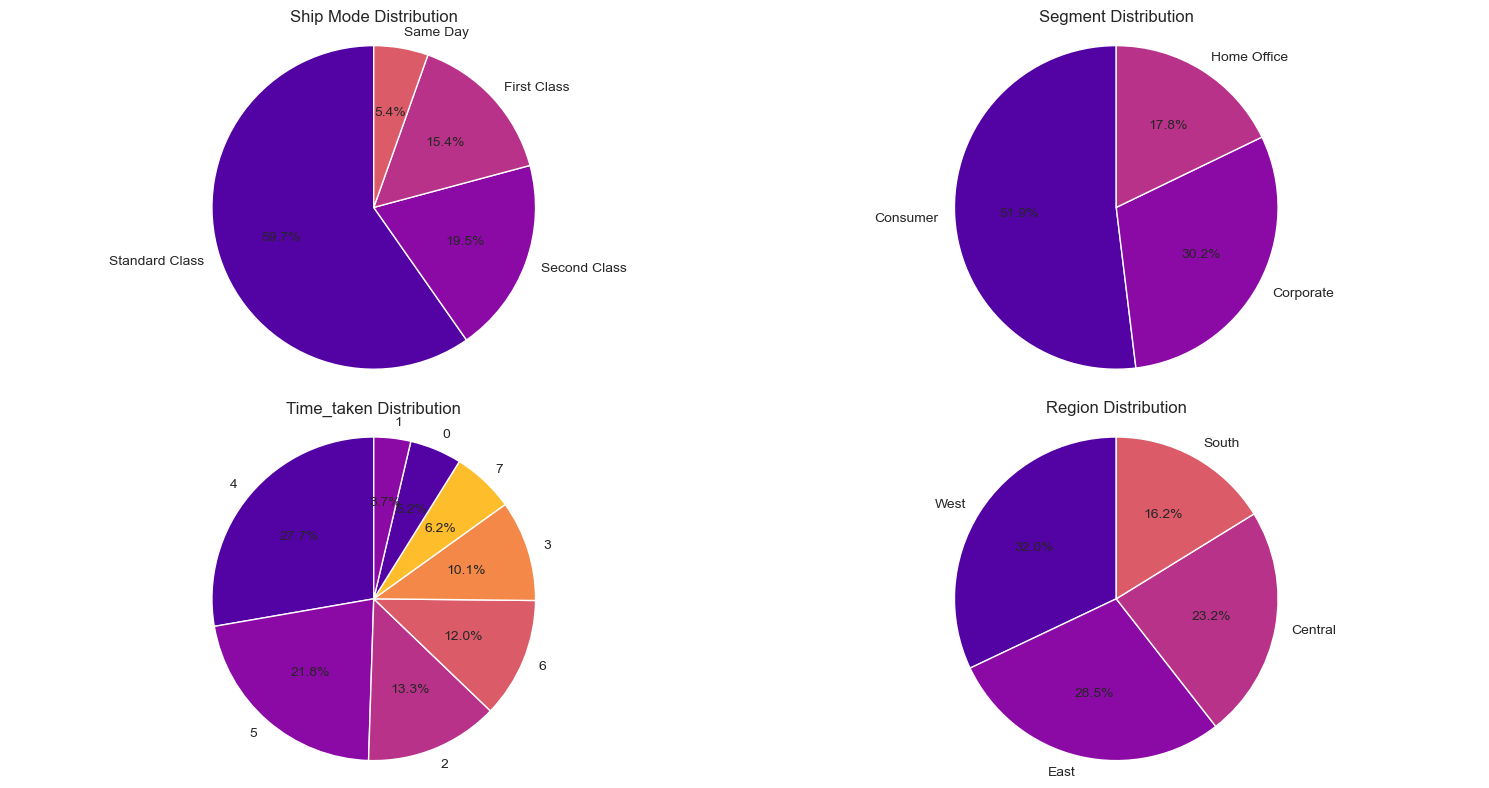

In [38]:
def plot_pie_chart(data, column, title,ax):
    value_counts = data[column].value_counts()
    labels = value_counts.index
    sizes = value_counts.values
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('plasma'))
    ax.set_title(title)
    ax.axis('equal')

fig, axes = plt.subplots(2, 2, figsize=(15, 8))

plot_pie_chart(data, 'Ship Mode', 'Ship Mode Distribution', axes[0, 0])
plot_pie_chart(data, 'Segment', 'Segment Distribution', axes[0, 1])
plot_pie_chart(data, 'Region', 'Region Distribution', axes[1, 1])
plot_pie_chart(data, 'Time_taken', 'Time_taken Distribution', axes[1,0])

plt.tight_layout()
plt.show()


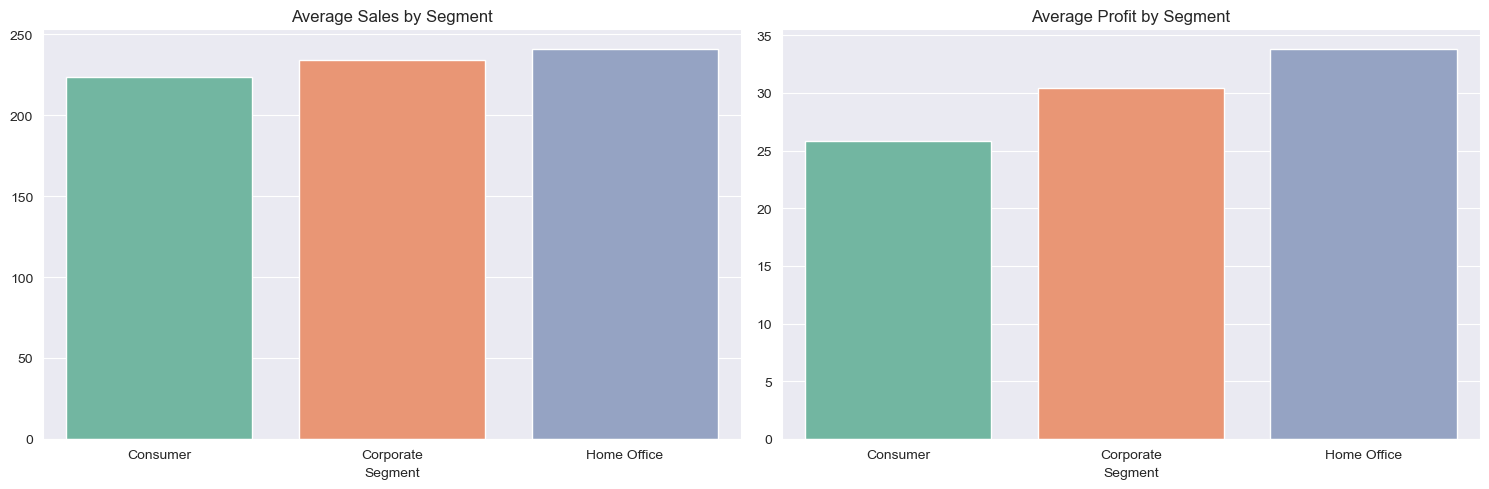

In [39]:
segment_profit = data.groupby('Segment')['Profit'].mean()
segment_sales = data.groupby('Segment')['Sales'].mean()

fig, axes = plt.subplots(1, 2, figsize=(15,5))

sns.barplot(x=segment_sales.index, y=segment_sales.values,hue=segment_sales.index,palette='Set2',ax=axes[0])
axes[0].set_title('Average Sales by Segment')

sns.barplot(x=segment_profit.index, y=segment_profit.values,hue=segment_profit.index,palette='Set2', ax=axes[1])
axes[1].set_title('Average Profit by Segment')

plt.tight_layout()
plt.show()

>`Home Office has most average Sales and most average Profits`

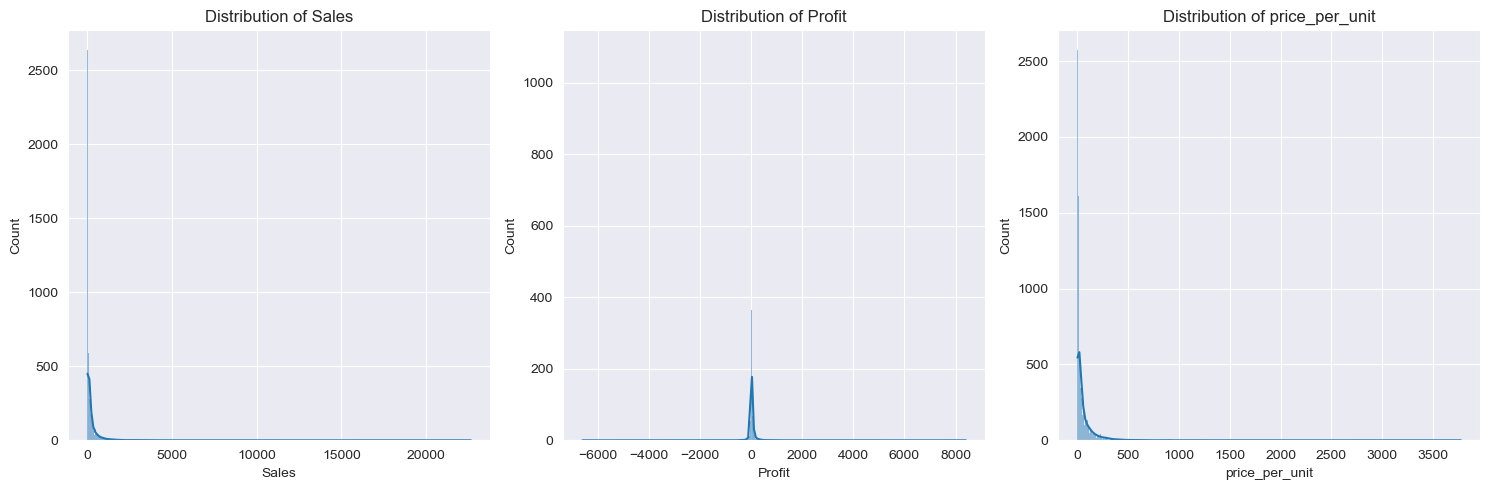

In [40]:
fig ,ax = plt.subplots(1,3, figsize=(15,5))

sns.histplot(data=data, x='Sales', kde=True, ax=ax[0])
ax[0].set_title('Distribution of Sales')

sns.histplot(data=data, x='Profit', kde=True, ax=ax[1])
ax[1].set_title('Distribution of Profit')

sns.histplot(data=data, x='price_per_unit', kde=True, ax=ax[2])
ax[2].set_title('Distribution of price_per_unit')

plt.tight_layout()
plt.show()

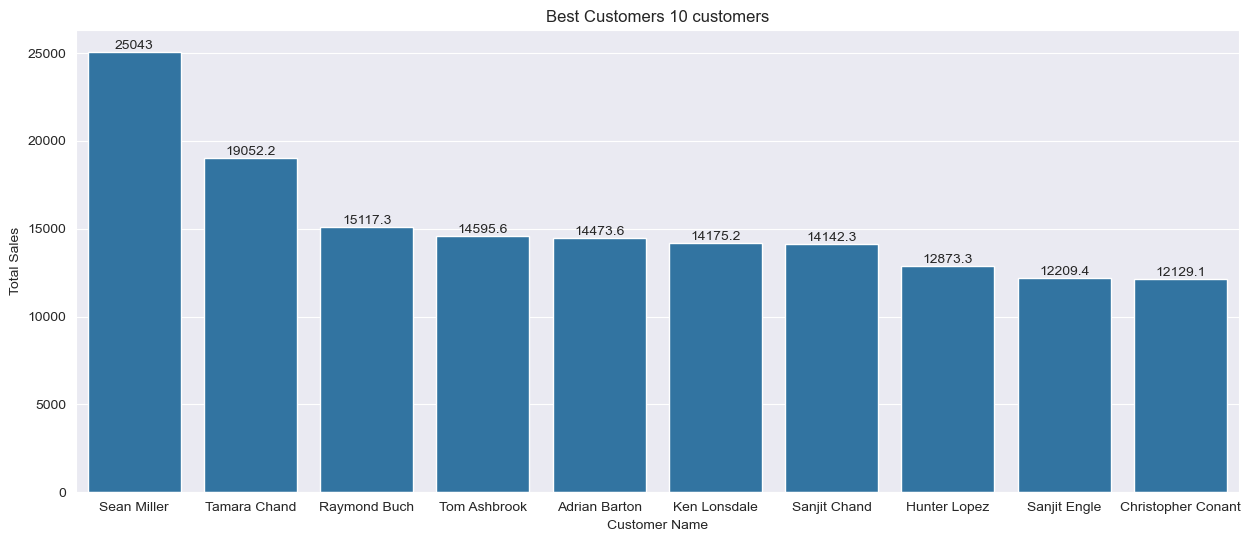

In [41]:
best_customers=data.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False).head(10)

a = sns.barplot(x=best_customers.index,y=best_customers.values)
plt.title('Best Customers 10 customers')
plt.ylabel('Total Sales')
plt.xlabel('Customer Name')

for i in a.containers:
    a.bar_label(i,)
plt.show()


In [42]:
print(data.groupby(['Customer Name','Segment'])[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False).head(5))
print(data.groupby(['Customer Name','Segment'])[['Sales','Profit']].sum().sort_values(by='Profit',ascending=False).head(5))

                               Sales     Profit
Customer Name Segment                          
Sean Miller   Home Office  25043.050 -1980.7393
Tamara Chand  Corporate    19052.218  8981.3239
Raymond Buch  Consumer     15117.339  6976.0959
Tom Ashbrook  Home Office  14595.620  4703.7883
Adrian Barton Consumer     14473.571  5444.8055
                             Sales     Profit
Customer Name Segment                        
Tamara Chand  Corporate  19052.218  8981.3239
Raymond Buch  Consumer   15117.339  6976.0959
Sanjit Chand  Consumer   14142.334  5757.4119
Hunter Lopez  Consumer   12873.298  5622.4292
Adrian Barton Consumer   14473.571  5444.8055


>* `Sean Miller is the best sales customer, but he's one of the worst at generating profits`

> * `Tamara Chand is the second best sales customer and the best at generating profits. `

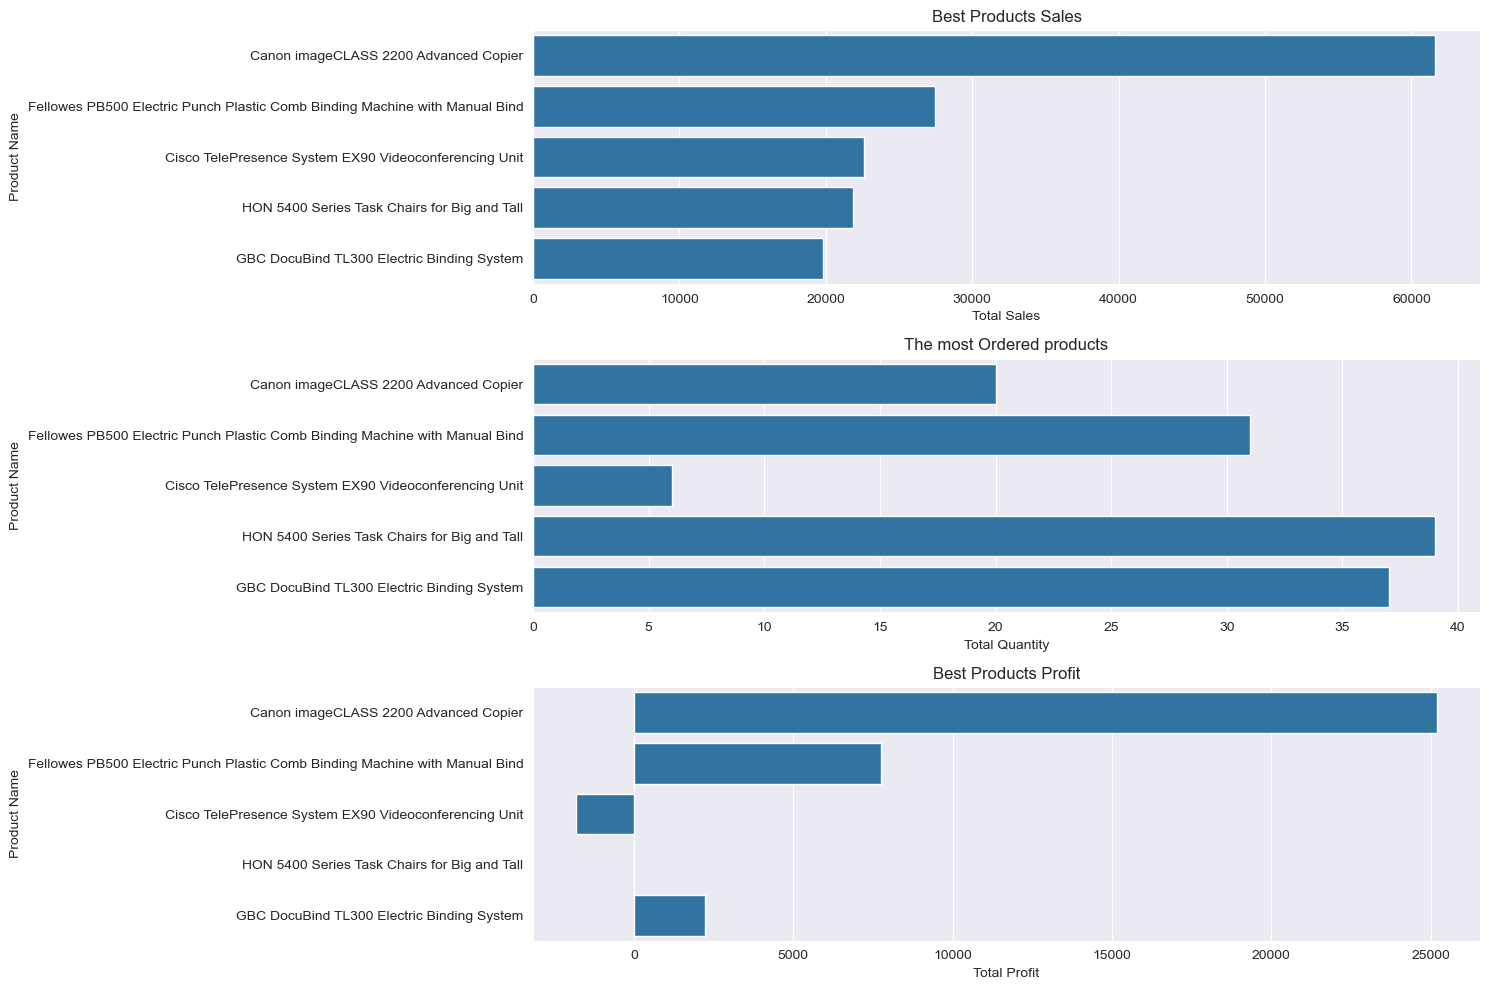

In [43]:
best_products = data.groupby('Product Name')[['Sales','Quantity','Profit']].sum().sort_values(by='Sales',ascending=False).head(5)
ax , fig = plt.subplots(3,1,figsize=(15,10))

sns.barplot(y=best_products.index, x=best_products['Sales'],ax=fig[0])
fig[0].set_title('Best Products Sales')
fig[0].set_ylabel('Product Name')
fig[0].set_xlabel('Total Sales')

sns.barplot(y=best_products.index, x=best_products['Quantity'],ax=fig[1])
fig[1].set_title('The most Ordered products')
fig[1].set_ylabel('Product Name')
fig[1].set_xlabel('Total Quantity')

sns.barplot(y=best_products.index, x=best_products['Profit'],ax=fig[2])
fig[2].set_title('Best Products Profit')
fig[2].set_ylabel('Product Name')
fig[2].set_xlabel('Total Profit')

plt.tight_layout()
plt.show()

> `Canon imageCLASS 2200 Advanced Copier is the best selling and Best Profit`

> `But HON 5400 its most Quantity ordered`

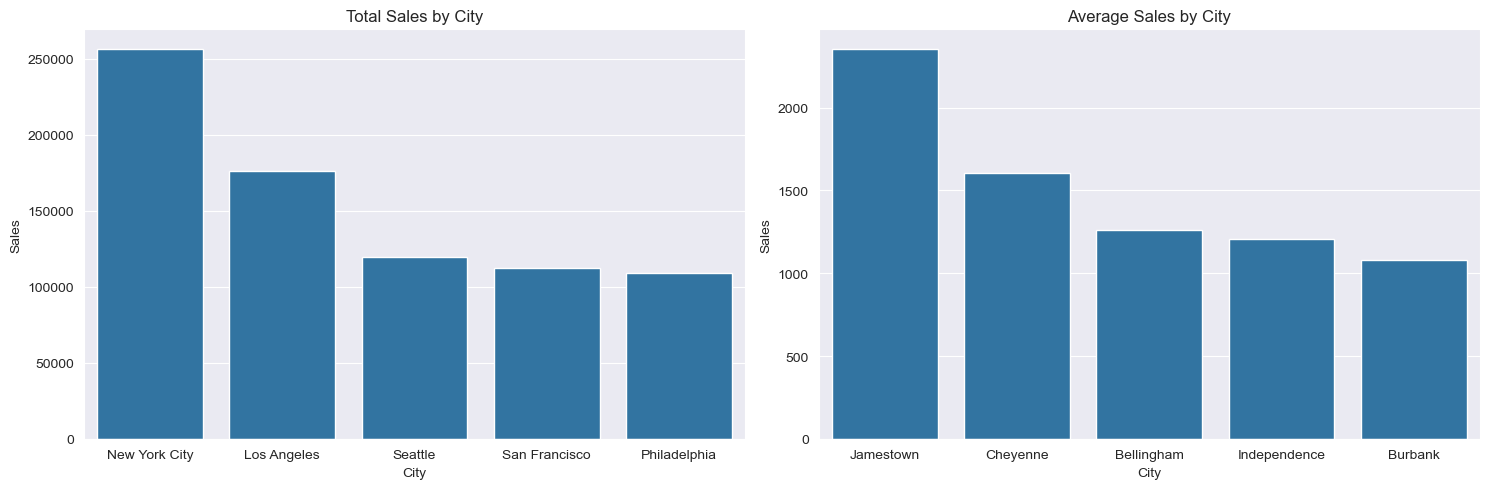

In [44]:
top_total_sales_by_citis=data.groupby('City')['Sales'].sum().sort_values(ascending=False).reset_index().head(5)
top_avg_sales_by_citis=data.groupby('City')['Sales'].mean().sort_values(ascending=False).reset_index().head(5)

ax, fig = plt.subplots(1, 2, figsize=(15, 5))

sns.barplot(data=top_total_sales_by_citis, x='City', y='Sales', ax=fig[0])
fig[0].set_title('Total Sales by City')

sns.barplot(data=top_avg_sales_by_citis, x='City', y='Sales', ax=fig[1])
fig[1].set_title('Average Sales by City')

plt.tight_layout()
plt.show()


**Write Your observations that you got from last 3 cells here** --------------------

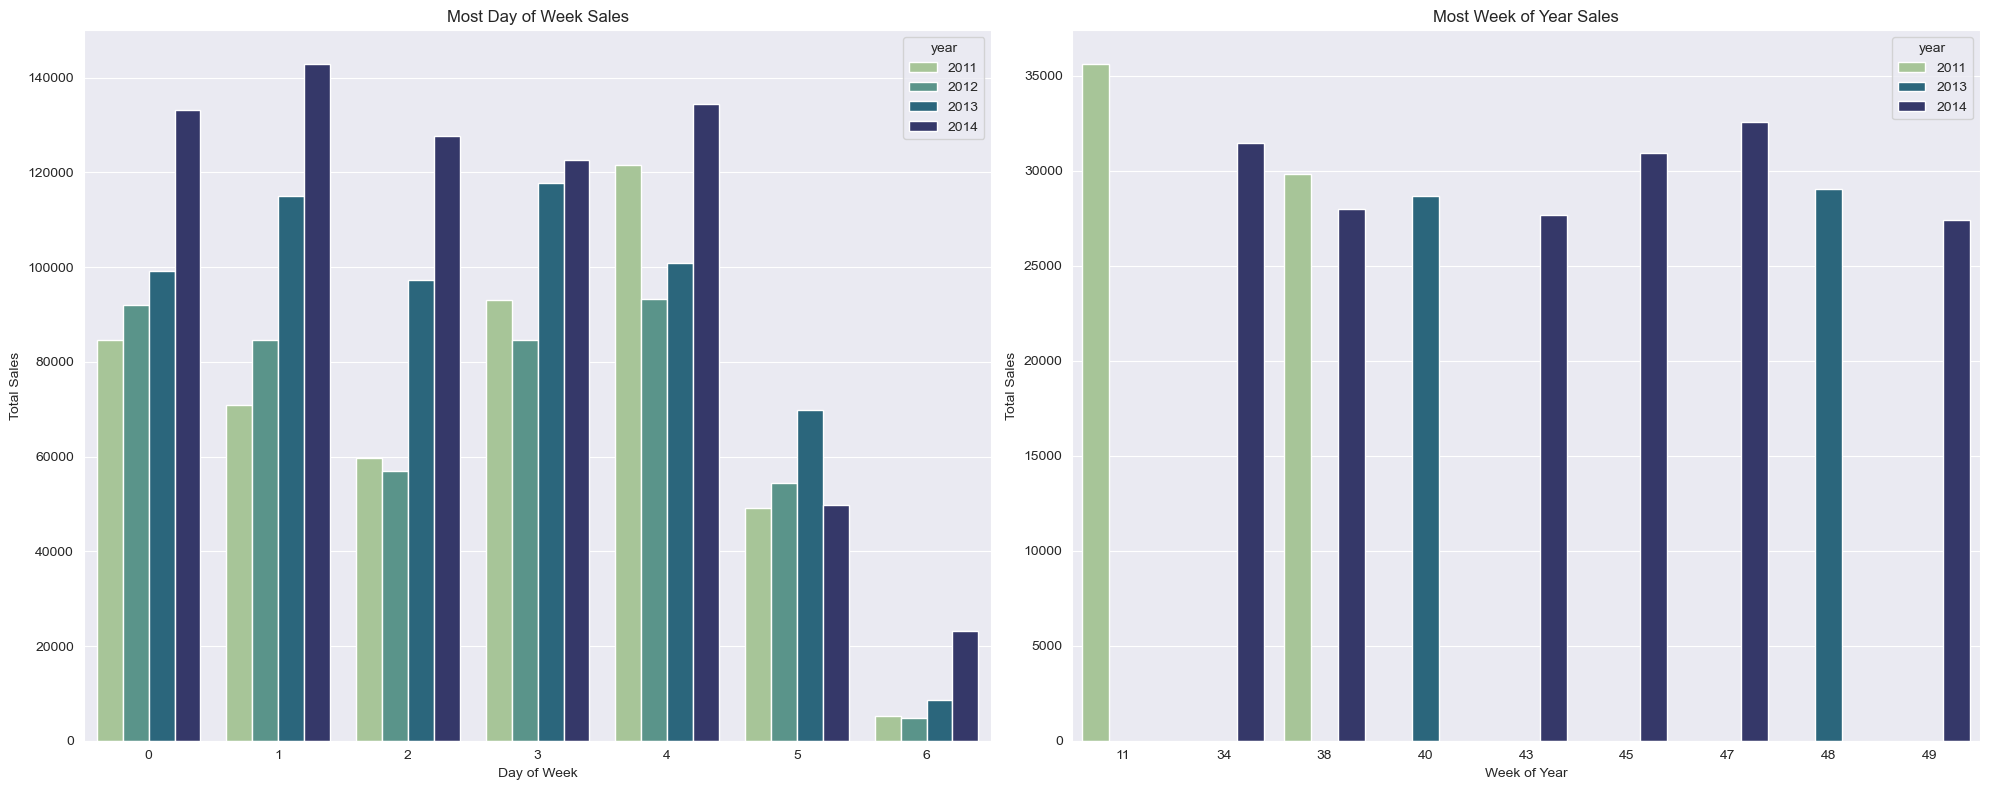

In [45]:
most_day_of_week_sales = data.groupby(['day_of_week','year'])['Sales'].sum().reset_index().sort_values(by='Sales',ascending=False)
most_week_of_year_sales = data.groupby(['week_of_year','year'])['Sales'].sum().reset_index().sort_values(by='Sales',ascending=False).head(10)

fig, axes = plt.subplots(1, 2, figsize=(20,8))
sns.barplot(data=most_day_of_week_sales, x='day_of_week', y='Sales',hue='year',palette='crest', ax=axes[0])
axes[0].set_title('Most Day of Week Sales')
axes[0].set_xlabel('Day of Week')
axes[0].set_ylabel('Total Sales')

sns.barplot(data=most_week_of_year_sales, x='week_of_year', y='Sales',hue='year',palette='crest', ax=axes[1])
axes[1].set_title('Most Week of Year Sales')
axes[1].set_xlabel('Week of Year')
axes[1].set_ylabel('Total Sales')

plt.tight_layout()
plt.show()

>`The best -selling day every week is Thursdays,and lest sales in Saturdays according to the first days of the week in the United States is on Sunday`

> `The most sales occur annually in the week 38`

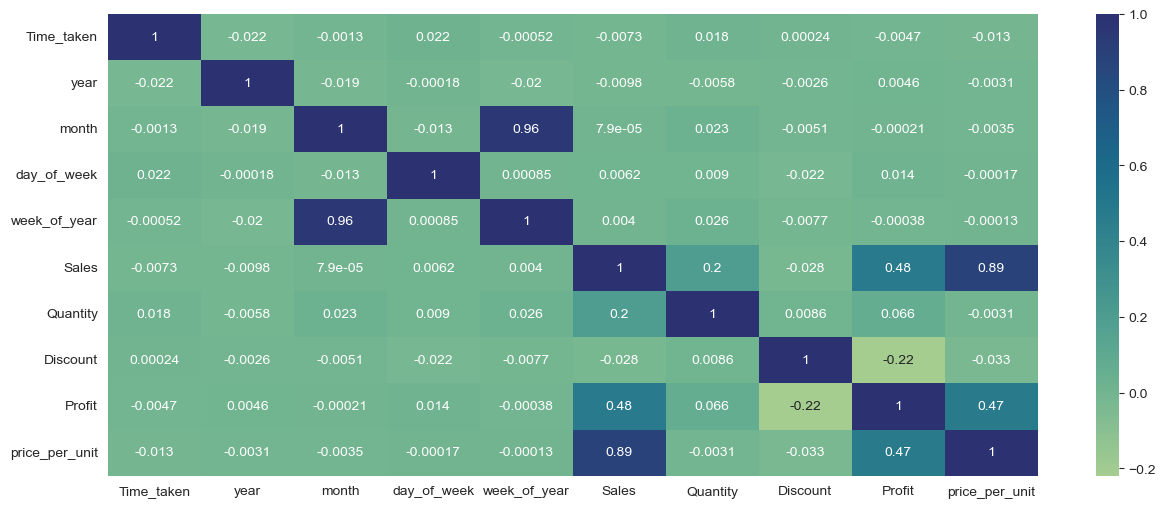

In [46]:
data.select_dtypes(include="number").corr()
sns.heatmap(data.select_dtypes(include="number").corr(),annot=True,cmap="crest")
plt.show()

In [47]:
data.to_csv("sales time series.csv",index=False)

# Time series Analysis

## ADF test for stationarity

In [48]:
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(data['Sales'])

In [49]:
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print(f'Critical Values:')
for key, value in adf_result[4].items():
    print(f'   {key}: {value}')

ADF Statistic: -99.26079402596324
p-value: 0.0
Critical Values:
   1%: -3.431004556246501
   5%: -2.8618292749021865
   10%: -2.5669239758928017


### **When Stationary**:
The ADF test shows the time series is stationary **(p-value < 0.05, ADF Statistic < Critical Values)**.

This means the data has stable statistical properties over time, making it ready for modeling.


---

### **When Non-Stationary**:
The ADF test indicates the time series is non-stationary (p-value ≥ 0.05, ADF Statistic > Critical Values).

This suggests trends or seasonality are present, requiring transformations like differencing to stabilize the data.

---
The ADF test results confirm that the time series is stationary, with a p-value of 0.0 and an ADF statistic of -99.26, which is significantly lower than the critical values (-3.43 at 1%, -2.86 at 5%, and -2.57 at 10%).

This indicates stable statistical properties over time, making the data suitable for time series modeling without further transformations


<Figure size 1000x500 with 0 Axes>

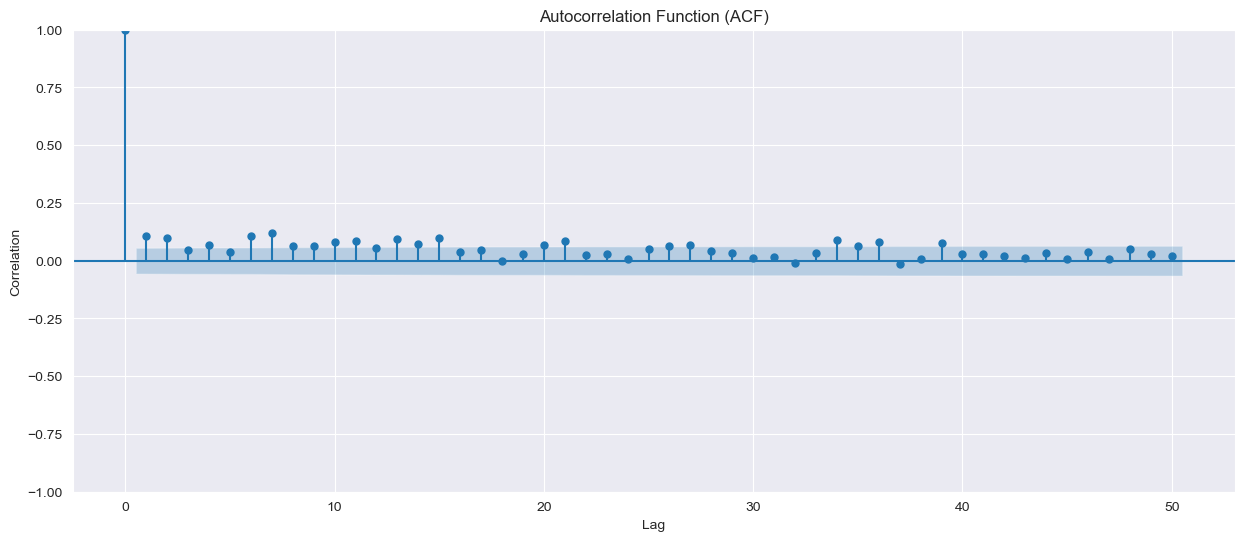

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Group works on history to collect daily sales
daily_sales = data.groupby('Order Date')['Sales'].sum()


# Draw ACF
plt.figure(figsize=(10, 5))
plot_acf(daily_sales, lags=50)  
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('Correlation')
plt.show()


<Figure size 1000x500 with 0 Axes>

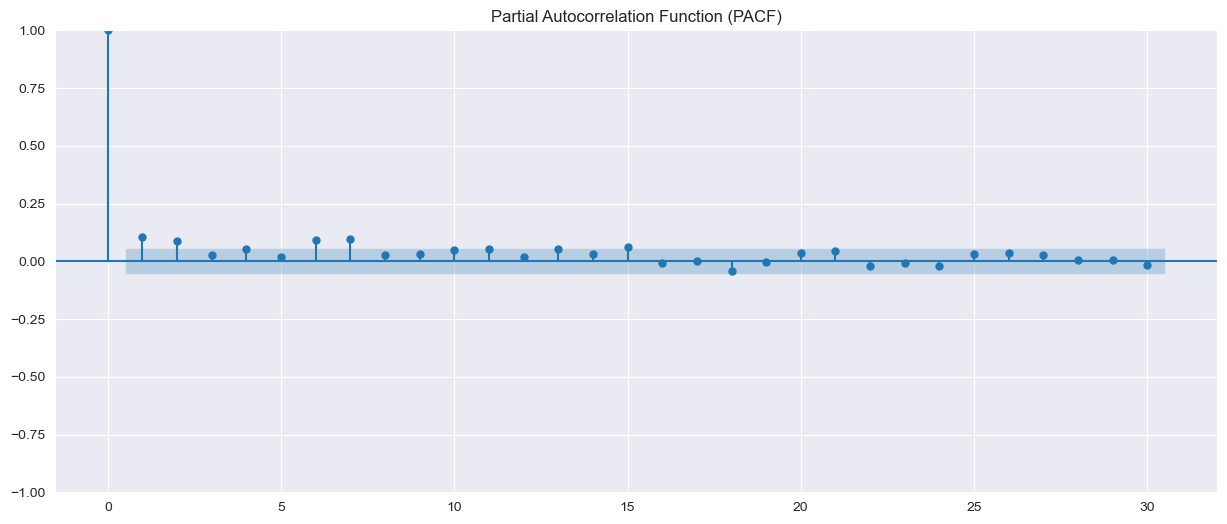

In [51]:
# Draw PACF
plt.figure(figsize=(10, 5))
plot_pacf(daily_sales, lags=30, method='ywm')  # Use Method = 'YWM' to avoid warnings
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

### ACF and PACF Insights
plotted:
- **ACF (Autocorrelation Function):** to observe overall correlations between sales and previous lags.
- **PACF (Partial Autocorrelation Function):** to observe direct correlations between sales and specific lags after removing intermediate effects.

From the plots:
- ACF showed slow decay, indicating strong autocorrelation at lag 1, 2, 3, etc.
- PACF showed a sharp drop after lag 1, suggesting that an **AR(1)** model might be a good fit.

# Time Series Models

## ARIMA

In [52]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [74]:
arima_df = data.groupby('Order Date')['Sales'].sum().reset_index()
arima_df.set_index('Order Date', inplace=True)

sales = arima_df['Sales'].resample("W").sum()

train = sales.loc[:'2013']
test = sales.loc['2014':]

In [75]:
arima_model = ARIMA(train, seasonal_order=(1, 0, 1, 52))
arima_model_fit = arima_model.fit()

arima_forecast = arima_model_fit.forecast(steps=len(test))

arima_model_fit.predict(start=test.index[0], end=test.index[-1])

mse_arima=mean_squared_error(test, arima_forecast)
rmse_arima = np.sqrt(mse_arima)
r2_arima=r2_score(test, arima_forecast)

print(f'RMSE: {rmse_arima}')
print(f'R2 Score: {r2_arima}')

c:\Users\Check-In\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.



RMSE: 7672.471179503719
R2 Score: 0.046368741383656875


In [76]:

# plot ARIMA Forecasting
plot_df = pd.DataFrame({
    'Date': test.index,
    'Test': test.values,
    'Forecast': arima_forecast
})

fig = px.line(plot_df, x='Date', y=['Test', 'Forecast'],
              title='ARIMA Forecast',
              labels={'value': 'Sales', 'variable': ''})
fig.show()

## Exponential Smoothing (ETS),

In [56]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# For trend + seasonality
model = ExponentialSmoothing(
    train,
    trend='add',               # 'add' or 'mul'
    seasonal='add',            # 'add' or 'mul'
    seasonal_periods=12        # e.g., 12 for monthly seasonality
)

fit = model.fit()

c:\Users\Check-In\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



In [57]:
forecast = fit.forecast(len(test))

mse_ets=mean_squared_error(test, forecast)
rmse_ets = np.sqrt(mse_ets)
r2_ets=r2_score(test, forecast)

print(f'RMSE: {rmse_ets}')
print(f'R2 Score: {r2_ets}')


RMSE: 14105.268766027235
R2 Score: -2.2230918216260234


In [58]:


# Create a DataFrame for plotting
plot_df = pd.DataFrame({
    'Date': test.index,
    'Test': test.values,
    'Forecast': forecast
})

# Create plot with plotly express
fig = px.line(plot_df, x='Date', y=['Test', 'Forecast'],
              title='ETS Forecast',
              labels={'value': 'Sales', 'variable': ''})

# Update line style for forecast
fig.update_traces(line_dash='dash', selector=dict(name='Forecast'))

fig.show()

## Prophet

In [59]:
from prophet import Prophet

# Prophet need two columns: ds (Order dates) ,y (Sales)
prophet_data = data.set_index('Order Date')
prophet_df = prophet_data.resample('ME').sum().reset_index()[['Order Date', 'Sales']]
prophet_df.rename(columns={'Order Date': 'ds', 'Sales': 'y'}, inplace=True)

# add extra regressors
prophet_df['month'] = prophet_df['ds'].dt.month
prophet_df['day_of_week'] = prophet_df['ds'].dt.dayofweek
prophet_df['week_of_year'] = prophet_df['ds'].dt.isocalendar().week.astype('int32')



train = prophet_df[prophet_df['ds'].between('2011-01-01', '2013-12-01')]
test = prophet_df[prophet_df['ds'].between('2014-01-01', '2014-12-01')]

# do Prophet model
m = Prophet()
m.add_regressor('month')
m.add_regressor('day_of_week')
m.add_regressor('week_of_year')


m.fit(train)


18:28:59 - cmdstanpy - INFO - Chain [1] start processing
18:29:04 - cmdstanpy - INFO - Chain [1] done processing


In [60]:
features=['ds','month','day_of_week','week_of_year']

future = test[features].copy()

forecast = m.predict(future)


mse_prophet = mean_squared_error(test['y'], forecast['yhat'])
rmse_prophet = np.sqrt(mse_prophet)
r2_prophet = r2_score(test['y'], forecast['yhat'])

print(f'RMSE: {rmse_prophet}')
print(f'R2 Score: {r2_prophet}')



fig = go.Figure()

fig.add_trace(go.Scatter(
    x=test['ds'],
    y=test['y'],
    name='Test',
    mode='lines'
))

fig.add_trace(go.Scatter(
    x=forecast['ds'],
    y=forecast['yhat'],
    name='Prophet Forecast',
    mode='lines',
    line=dict(dash='dash')
))

fig.update_layout(
    title='Prophet Forecast',
    xaxis_title='Date',
    yaxis_title='Sales',
    showlegend=True,
    width=1200,
    height=600
)

fig.show()

RMSE: 10570.901964163231
R2 Score: 0.8160823792907812


# Preprocessing

In [61]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder , StandardScaler,QuantileTransformer
from sklearn.model_selection import train_test_split

In [62]:
data.drop(['Product Name','Customer Name'],axis=1,inplace=True)


data['sales_lag_1'] = data['Sales'].shift(1)
data['sales_lag_2'] = data['Sales'].shift(2)
data['sales_lag_3'] = data['Sales'].shift(3)
data['sales_lag_4'] = data['Sales'].shift(4)
data['sales_lag_5'] = data['Sales'].shift(5)

data.dropna(inplace=True)

train = data[data['year'].between(2011, 2013)]
test = data[data['year'].between(2014, 2014)]

dates_train = train['Order Date']
dates_test = test['Order Date']


x_train = train.drop(['Sales','Order Date'],axis=1)
x_test = test.drop(['Sales','Order Date'],axis=1)
y_train = train['Sales']
y_test = test['Sales']

In [63]:
def preprocess_data(data):
    """
    Preprocess the dataset by applying cyclical encoding, scaling, one-hot encoding, and label encoding.

    Parameters:
        data (pd.DataFrame): The input dataset to preprocess.

    Returns:
        pd.DataFrame: The preprocessed dataset.
    """


    # Step 2: Scaling Numerical Columns
    # Quantile Scaling for skewed columns
    quantile_columns = ['Profit', 'price_per_unit']
    quantile_transformer = QuantileTransformer(output_distribution='normal', random_state=42)
    data[quantile_columns] = quantile_transformer.fit_transform(data[quantile_columns])

    # Standard Scaling for normally distributed numerical columns
    num_scaling = ['Quantity', 'Discount', 'Time_taken']
    scaler = StandardScaler()
    data[num_scaling] = scaler.fit_transform(data[num_scaling])

    col_label = data.select_dtypes('object').columns.tolist()
    label_encoder = LabelEncoder()
    for col in col_label:
        data[col] = label_encoder.fit_transform(data[col])

    return data



In [95]:
def plot_forecast(dates,y_actual,y_pred,model_name : str):

    # Convert y_test and y_pred to pandas Series
    dates = pd.to_datetime(dates)

    y_actual_series = pd.Series(y_actual.values, index=dates)
    y_pred_series = pd.Series(y_pred, index=dates)

    y_actual_resampled = y_actual_series.resample('W').sum()
    y_pred_resampled = y_pred_series.resample('W').sum()


    fig = go.Figure()

    # Actual Sales
    fig.add_trace(go.Scatter(
        x=y_actual_resampled.index,
        y=y_actual_resampled.values,
        mode='lines+markers',
        name='Actual Weekly Sales',
        line=dict(color='royalblue', width=2),
        marker=dict(size=6)
    ))

    # Predicted Sales
    fig.add_trace(go.Scatter(
        x=y_pred_resampled.index,
        y=y_pred_resampled.values,
        mode='lines+markers',
        name='Predicted Weekly Sales',
        line=dict(color='firebrick', width=2, dash='dash'),
        marker=dict(size=6)
    ))

    # Format the plot
    fig.update_layout(
        title='📈 Weekly Actual vs Predicted Sales',
        title_font=dict(size=22, color='darkblue'),
        xaxis_title='Date',
        yaxis_title='Sales Amount',
        xaxis=dict(showgrid=True, gridcolor='lightgray'),
        yaxis=dict(showgrid=True, gridcolor='lightgray'),
        plot_bgcolor='white',
        legend=dict(
            x=0.01, y=0.99,
            bgcolor='rgba(255,255,255,0)',
            bordercolor='gray'
        ),
        hovermode='x unified',
        height=550,
        width=1100
    )

    fig.write_image(config['dir']['artifacts_dir'] +'/forecast.png')

    return fig

    fig.show()

In [65]:
x_train_processed = preprocess_data(x_train)
x_test_processed = preprocess_data(x_test)

## SARIMAX

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error


data_processed = preprocess_data(data)

# Convert 'Order Date' to datetime
data_processed_sarima = data_processed.set_index('Order Date')


sales = data_processed_sarima['Sales'].resample('W').sum()
features = data_processed_sarima[['Ship Mode', 'Segment', 'City', 'State', 'Region', 'Category',
       'Sub-Category', 'Time_taken', 'year','Quantity', 'Discount', 'Profit',
       'price_per_unit']].resample('W').sum()

# splite  train/test
train_sales = sales.loc[:'2013']
test_sales = sales.loc['2014':]

train_exog = features.loc[:'2013']
test_exog = features.loc['2014':]


# Train the model
model = SARIMAX(train_sales, exog=train_exog, order=(1,1,1), seasonal_order=(1,1,1,52))
model_sarimax = model.fit(disp=False)

c:\Users\Check-In\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.

c:\Users\Check-In\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [92]:
!pip install -U kaleido

  Using cached kaleido-0.2.1-py2.py3-none-win_amd64.whl.metadata (15 kB)
Using cached kaleido-0.2.1-py2.py3-none-win_amd64.whl (65.9 MB)


In [97]:
# SARIMAX Forecast
y_pred_sarima = model_sarimax.predict(start=test_sales.index[0], end=test_sales.index[-1], exog=test_exog)

# RMSE and R2_score
mse_sarimax = mean_squared_error(test_sales, y_pred_sarima)
rmse_sarimax = np.sqrt(mse_sarimax)
r2_sarimax = r2_score(test_sales, y_pred_sarima)

print(f'RMSE: {rmse_sarimax}')
print(f'R2 Score: {r2_sarimax}')


# Create a DataFrame with actual and predicted values
plot_df = pd.DataFrame({
    'Date': test_sales.index,
    'Actual': test_sales.values,
    'Predicted': y_pred_sarima.values
})

# Melt the DataFrame for plotting
plot_df_melted = pd.melt(plot_df, id_vars=['Date'], value_vars=['Actual', 'Predicted'], 
                        var_name='Type', value_name='Sales')

# Create the line plot
fig = px.line(plot_df_melted, x='Date', y='Sales', color='Type',
              title='SARIMAX: Actual vs Predicted Sales',
              labels={'Sales': 'Weekly Sales', 'Date': 'Date'})

fig.show()





RMSE: 4664.894048565159
R2 Score: 0.6474720827001673


## Random Forest

In [68]:
from sklearn.ensemble import RandomForestRegressor

In [69]:
rf=RandomForestRegressor(random_state=42)
rf.fit(x_train_processed,y_train)

RandomForestRegressor(random_state=42)

In [70]:
y_pred = rf.predict(x_test_processed)


mse_rf = mean_squared_error(y_test, y_pred)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test,y_pred)



print("RMSE:",rmse_rf)
print("R2 Score:",r2_rf )

RMSE: 126.36941755696338
R2 Score: 0.9532722380872625


### Fine tuning

In [71]:
import optuna

In [98]:
# Define objective function
def objective(trial):
    # Suggest values for hyperparameters
    params = {
    'n_estimators' : trial.suggest_int("n_estimators", 10, 200, log=True),
    'max_depth' : trial.suggest_int("max_depth", 2, 32),
    'min_samples_split' : trial.suggest_int("min_samples_split", 2, 10),
    'min_samples_leaf' :trial.suggest_int("min_samples_leaf", 1, 10)
    }
    # Create and fit random forest model
    model = RandomForestRegressor(**params)
    model.fit(x_train_processed, y_train)

    # Make predictions and calculate RMSE
    y_pred = model.predict(x_test_processed)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Return MAE
    return rmse

study = optuna.create_study(direction='minimize')

study.optimize(objective,n_trials=20,show_progress_bar=True)

[I 2025-05-16 18:52:58,378] A new study created in memory with name: no-name-8169604e-ec50-4252-bb53-1759280cfb16


  0%|          | 0/20 [00:00<?, ?it/s]

[I 2025-05-16 18:53:06,682] Trial 0 finished with value: 202.85052810145896 and parameters: {'n_estimators': 103, 'max_depth': 5, 'min_samples_split': 8, 'min_samples_leaf': 9}. Best is trial 0 with value: 202.85052810145896.
[I 2025-05-16 18:53:15,129] Trial 1 finished with value: 134.05174204639985 and parameters: {'n_estimators': 153, 'max_depth': 29, 'min_samples_split': 5, 'min_samples_leaf': 6}. Best is trial 1 with value: 134.05174204639985.
[I 2025-05-16 18:53:18,619] Trial 2 finished with value: 144.51134665052322 and parameters: {'n_estimators': 68, 'max_depth': 25, 'min_samples_split': 4, 'min_samples_leaf': 6}. Best is trial 1 with value: 134.05174204639985.
[I 2025-05-16 18:53:19,152] Trial 3 finished with value: 160.11033617379738 and parameters: {'n_estimators': 10, 'max_depth': 28, 'min_samples_split': 7, 'min_samples_leaf': 6}. Best is trial 1 with value: 134.05174204639985.
[I 2025-05-16 18:53:20,251] Trial 4 finished with value: 287.6271233126577 and parameters: {'n_

In [99]:
study.best_params

{'n_estimators': 195,
 'max_depth': 31,
 'min_samples_split': 10,
 'min_samples_leaf': 2}

In [ ]:
trial = study.best_params 
best_model_rf = RandomForestRegressor(**trial)
best_model_rf.fit(x_train_processed,y_train)
preds_rf = best_model_rf.predict(x_test_processed)
mse_rf = mean_squared_error(y_test, preds_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test,preds_rf)

print(f'Final MSE for Random Forest :{mse_rf}')
print(f'Final RMSE for Random Forest : {rmse_rf:.4f}')
print(f'Final R2 for Random Forest : {r2_rf:.4f}')

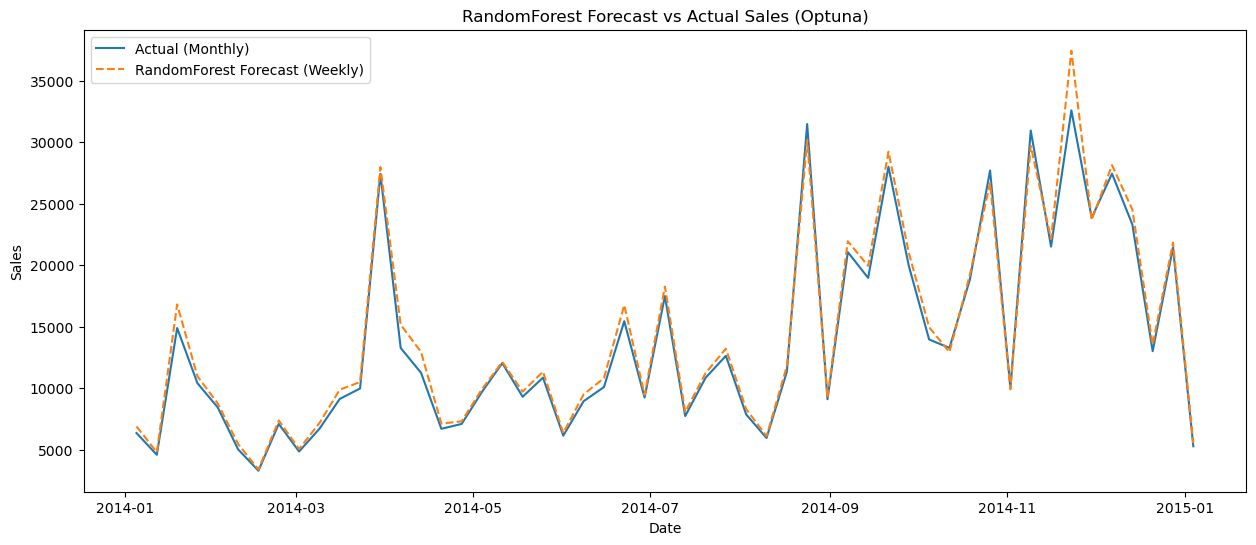

In [140]:
plot_forecast(dates_test,y_test,preds_rf,model_name='RandomForest')

## XGBoost

In [141]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score

In [142]:
model_xgb = XGBRegressor(random_state=42)
model_xgb.fit(x_train_processed, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [143]:
x_test_processed = preprocess_data(x_test)

y_pred = model_xgb.predict(np.asarray(x_test_processed))

rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred))
r2_xgb = r2_score(y_test, y_pred)

print(f'RMSE: {rmse_xgb}')
print(f'R2 Score: {r2_xgb}')

RMSE: 176.99546146222076
R2 Score: 0.908332524035075


### Fine Tuning with Optuna

In [144]:
import optuna

In [145]:
import xgboost as xgb

x_train_processed = preprocess_data(x_train)
x_test_processed = preprocess_data(x_test)

dtrain = xgb.DMatrix(x_train_processed,y_train)
dtest = xgb.DMatrix(x_test_processed,y_test)

In [146]:

import xgboost as xgb
def objective(trial):

      # Define hyperparameters
    params = {
          "objective": "reg:squarederror",
          "eval_metric": "rmse",
          "booster": trial.suggest_categorical("booster", ["gbtree", "gblinear", "dart"]),
          "lambda": trial.suggest_float("lambda", 1e-8, 1.0, log=True),
          "alpha": trial.suggest_float("alpha", 1e-8, 1.0, log=True),
      }

    if params["booster"] == "gbtree" or params["booster"] == "dart":
          params["max_depth"] = trial.suggest_int("max_depth", 1, 9)
          params["eta"] = trial.suggest_float("eta", 1e-8, 1.0,)
          params["gamma"] = trial.suggest_float("gamma", 1e-8, 1.0,)
          params["grow_policy"] = trial.suggest_categorical(
              "grow_policy", ["depthwise", "lossguide"]
          )

      # Train XGBoost model
    bst = xgb.train(params, dtrain)
    preds = bst.predict(dtest)
    error = mean_squared_error(y_test, preds)

    return error

In [147]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=500)

[I 2025-05-15 06:22:58,672] A new study created in memory with name: no-name-ea1b3f17-cb90-4845-90a6-27a6e8a1e7f3
[I 2025-05-15 06:22:58,779] Trial 0 finished with value: 213776.47376834307 and parameters: {'booster': 'gblinear', 'lambda': 0.01851067068732925, 'alpha': 3.8883679217270784e-07}. Best is trial 0 with value: 213776.47376834307.
[I 2025-05-15 06:22:58,827] Trial 1 finished with value: 47286.3503560217 and parameters: {'booster': 'gbtree', 'lambda': 1.614202815476177e-07, 'alpha': 0.18711006861669713, 'max_depth': 2, 'eta': 0.29345322939155805, 'gamma': 0.7901558448480566, 'grow_policy': 'depthwise'}. Best is trial 1 with value: 47286.3503560217.
[I 2025-05-15 06:22:58,862] Trial 2 finished with value: 213903.09614530116 and parameters: {'booster': 'gblinear', 'lambda': 0.06253674366868074, 'alpha': 0.01216831057934032}. Best is trial 1 with value: 47286.3503560217.
[I 2025-05-15 06:22:59,131] Trial 3 finished with value: 69693.70845073639 and parameters: {'booster': 'gbtree

In [161]:
best_model = xgb.train(study.best_params, dtrain)
preds = best_model.predict(dtest)
mse_xgb = mean_squared_error(y_test, preds)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test,preds)

print(f'Final RMSE on validation set: {rmse_xgb:.4f}')
print(f'Final R2 on validation set: {r2_xgb:.4f}')



Final RMSE on validation set: 154.0802
Final R2 on validation set: 0.9305


In [149]:
# The best result
print('Best trial:')
trial = study.best_trial
print(f'  MSE: {trial.value:.4f}')
print(f'  RMSE: {np.sqrt(trial.value):.4f}')
print('  Best Params:')
for key, value in trial.params.items():
    print(f'    {key}: {value}')


Best trial:
  MSE: 23740.7200
  RMSE: 154.0802
  Best Params:
    booster: dart
    lambda: 1.5309083858688787e-05
    alpha: 0.00013692329377585526
    max_depth: 4
    eta: 0.2945141498016259
    gamma: 0.6615521473926246
    grow_policy: depthwise


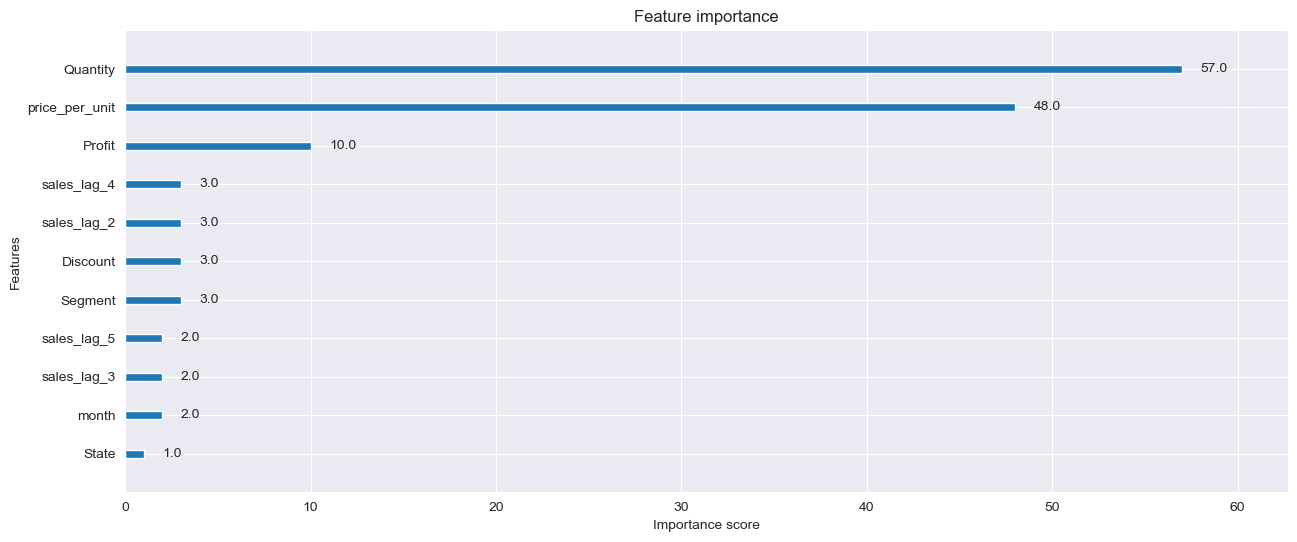

In [167]:
from xgboost import plot_importance
# plt.figure(figsize=(12,6))
plot_importance(best_model)
plt.show()


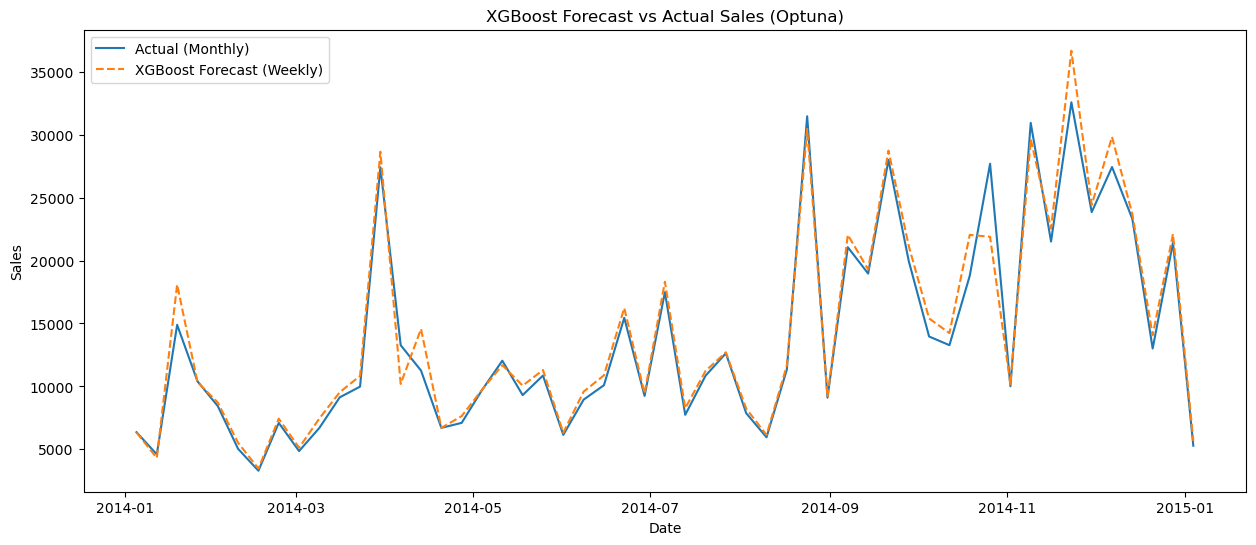

In [151]:
y_test_series = pd.Series(y_test.values, index=dates_test)
y_pred_series = pd.Series(preds, index=dates_test)

y_test_resampled = y_test_series.resample('W').sum()
y_pred_resampled = y_pred_series.resample('W').sum()

plt.figure(figsize=(15,6))

plt.plot(y_test_resampled.index, y_test_resampled.values, label='Actual (Monthly)')
plt.plot(y_pred_resampled.index, y_pred_resampled.values, label='XGBoost Forecast (Weekly)', linestyle='--')
plt.xlabel('Date')

plt.ylabel('Sales')
plt.title('XGBoost Forecast vs Actual Sales (Optuna)')
plt.legend()
plt.show()


# Final report

In [162]:
final_report = pd.DataFrame({
    'Model': ['SARIMAX', 'ARIMA',' Prophet','XGBoost','Random Forest'],
    'mse': [mse_sarimax,mse_arima,mse_prophet,mse_xgb,mse_rf],
    'RMSE': [rmse_sarimax,rmse_arima,rmse_prophet,rmse_xgb,rmse_rf],
    'R2_Score': [r2_sarimax,r2_arima,r2_prophet,r2_xgb,r2_rf]
})

In [163]:
final_report['R2_Score_precentage'] = (final_report['R2_Score']*100).round(2)


In [164]:
final_report

,Model,mse,RMSE,R2_Score,R2_Score_precentage
0,SARIMAX,2.380589e+07,4879.127656,0.614349,61.43
1,ARIMA,5.886681e+07,7672.471180,0.046369,4.64
2,Prophet,1.117440e+08,10570.901964,0.816082,81.61
3,XGBoost,2.374072e+04,154.080239,0.930532,93.05
4,Random Forest,8.570580e+03,92.577429,0.974922,97.49


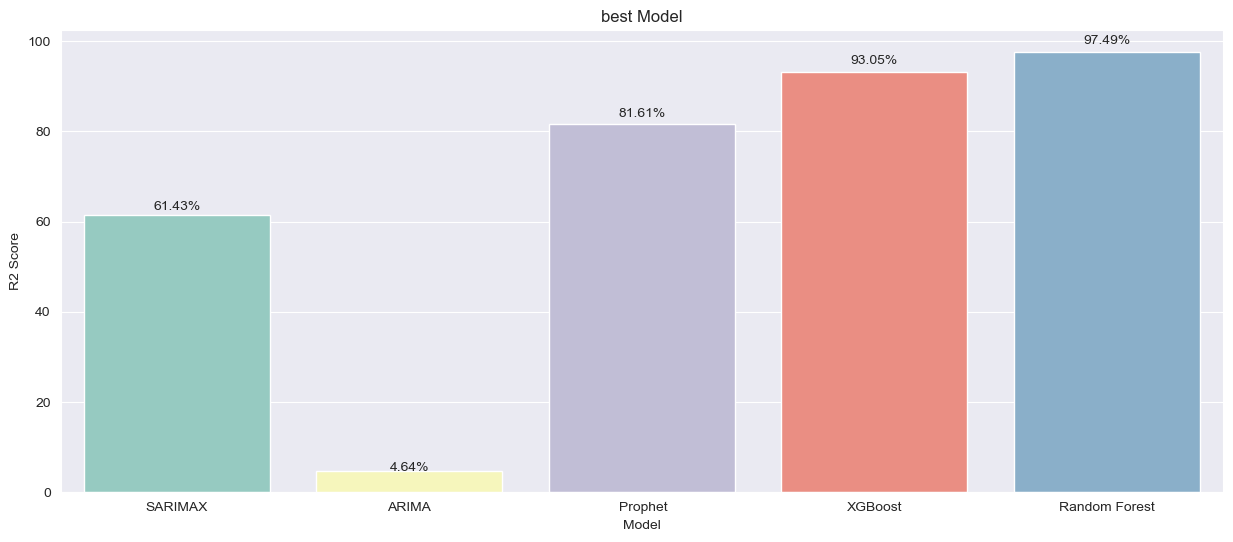

In [168]:
ax = sns.barplot(x='Model', y='R2_Score_precentage', data=final_report,hue='Model', palette='Set3')
plt.xlabel('Model')
plt.ylabel('R2 Score')
plt.title('best Model')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height}%', (x + width/2, y + height*1.02), ha='center')

plt.show()